***LOAN STATUS PREDICTION***

This project aims to predict loan approval status using machine learning techniques. It utilizes applicant data such as gender, marital status, income, and credit history to determine whether a loan will be approved or not. The goal is to assist financial institutions in making informed lending decisions.

   - Loan_ID: Unique identifier for each loan application.
        
   - Gender: Applicant's gender.
    
   - Married: Applicant's marital status.
    
   - Dependents: Number of dependents on the applicant.
    
   - Education: Applicant's level of education.
    
   - Self_Employed: Indicates if the applicant is self-employed.
    
   - ApplicantIncome: Income of the primary applicant.
    
   - CoapplicantIncome: Income of the co-applicant (if any).
    
   - LoanAmount: Amount of loan applied for.
    
   - Loan_Amount_Term: Term (in months) of the loan.
    
   - Credit_History: Credit history meets guidelines (1 for yes, 0 for no).
    
   - Property_Area: Type of property location.
    
   - Loan_Status: Target variable indicating if the loan was approved or not.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
loan_dataset = pd.read_csv('loan_status.csv')

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**DATA PREPROCESSING**

In [ ]:
# Handling the null values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

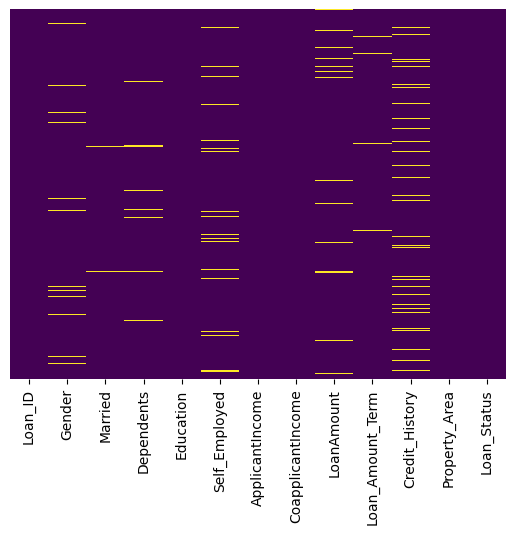

In [ ]:
#plotting the heatmap
sns.heatmap(data=loan_dataset.isnull(), yticklabels=False,
            cbar=False, cmap='viridis' )

In [ ]:
#dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# Handling the null values
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

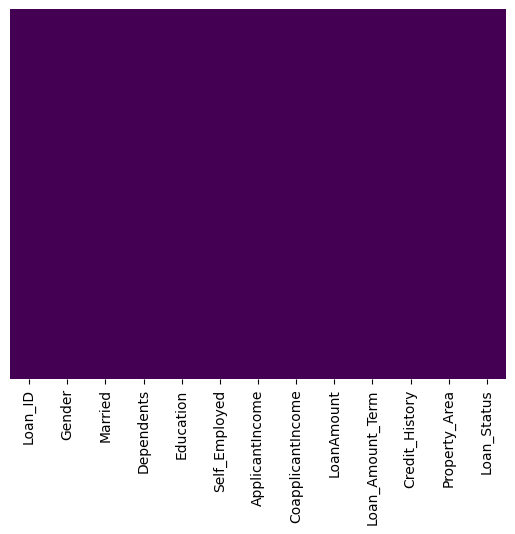

In [ ]:
#plotting the heatmap
sns.heatmap(data=loan_dataset.isnull(), yticklabels=False,
            cbar=False, cmap='viridis' )

In [ ]:
loan_dataset['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

 We can see that the number of males are more than the number of females. that means the dataset is imbalanced dataset. so we need to balance the dataset by resampling.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_status 2.csv to loan_status 2.csv


In [ ]:
ln_dt = pd.read_csv('loan_status 2.csv')

In [ ]:
ln_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001931,Female,No,0,Graduate,No,4124,0,115,360,1,Semiurban,Y
1,LP001925,Female,No,0,Graduate,Yes,2600,1717,99,300,1,Semiurban,N
2,LP001955,Female,No,0,Graduate,No,5000,2541,151,480,1,Rural,N
3,LP001954,Female,Yes,1,Graduate,No,4666,0,135,360,1,Urban,Y
4,LP001917,Female,No,0,Graduate,No,1811,1666,54,360,1,Urban,Y


In [ ]:
ln_dt['Gender'].value_counts()

Gender
Female    86
Male      86
Name: count, dtype: int64

Now , as the number of males are equal to number of females ; this shows that the dataset is balanced.

In [ ]:
ln_dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# label encoding
ln_dt.replace({"Loan_Status":{'N':0,'Y':1}},inplace = True)

In [ ]:
ln_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001931,Female,No,0,Graduate,No,4124,0,115,360,1,Semiurban,1
1,LP001925,Female,No,0,Graduate,Yes,2600,1717,99,300,1,Semiurban,0
2,LP001955,Female,No,0,Graduate,No,5000,2541,151,480,1,Rural,0
3,LP001954,Female,Yes,1,Graduate,No,4666,0,135,360,1,Urban,1
4,LP001917,Female,No,0,Graduate,No,1811,1666,54,360,1,Urban,1


In [ ]:
# Dependent column values
ln_dt['Dependents'].value_counts()

Dependents
0    116
1     24
2     22
3     10
Name: count, dtype: int64

In [ ]:
# converting categorical columns to numeric values
ln_dt.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1 ,'Not Graduate':0}},inplace = True)

In [ ]:
ln_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001931,0,0,0,1,0,4124,0,115,360,1,1,1
1,LP001925,0,0,0,1,1,2600,1717,99,300,1,1,0
2,LP001955,0,0,0,1,0,5000,2541,151,480,1,0,0
3,LP001954,0,1,1,1,0,4666,0,135,360,1,2,1
4,LP001917,0,0,0,1,0,1811,1666,54,360,1,2,1


In [ ]:
ln_dt.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
167,LP001119,1,0,0,1,0,3600,0,80,360,1,2,0
168,LP002288,1,1,2,0,0,2889,0,45,180,0,2,0
169,LP002296,1,0,0,0,0,2755,0,65,300,1,0,0
170,LP001120,1,0,0,1,0,1800,1213,47,360,1,2,1
171,LP002281,1,1,0,1,0,3033,1459,95,360,1,2,1


**DATA VISUALIZATION**

1. Creating Count Plot for Categorical Variables:

Gender

Married

Dependents

Education

Self_Employed

Property_Area

Loan_Status

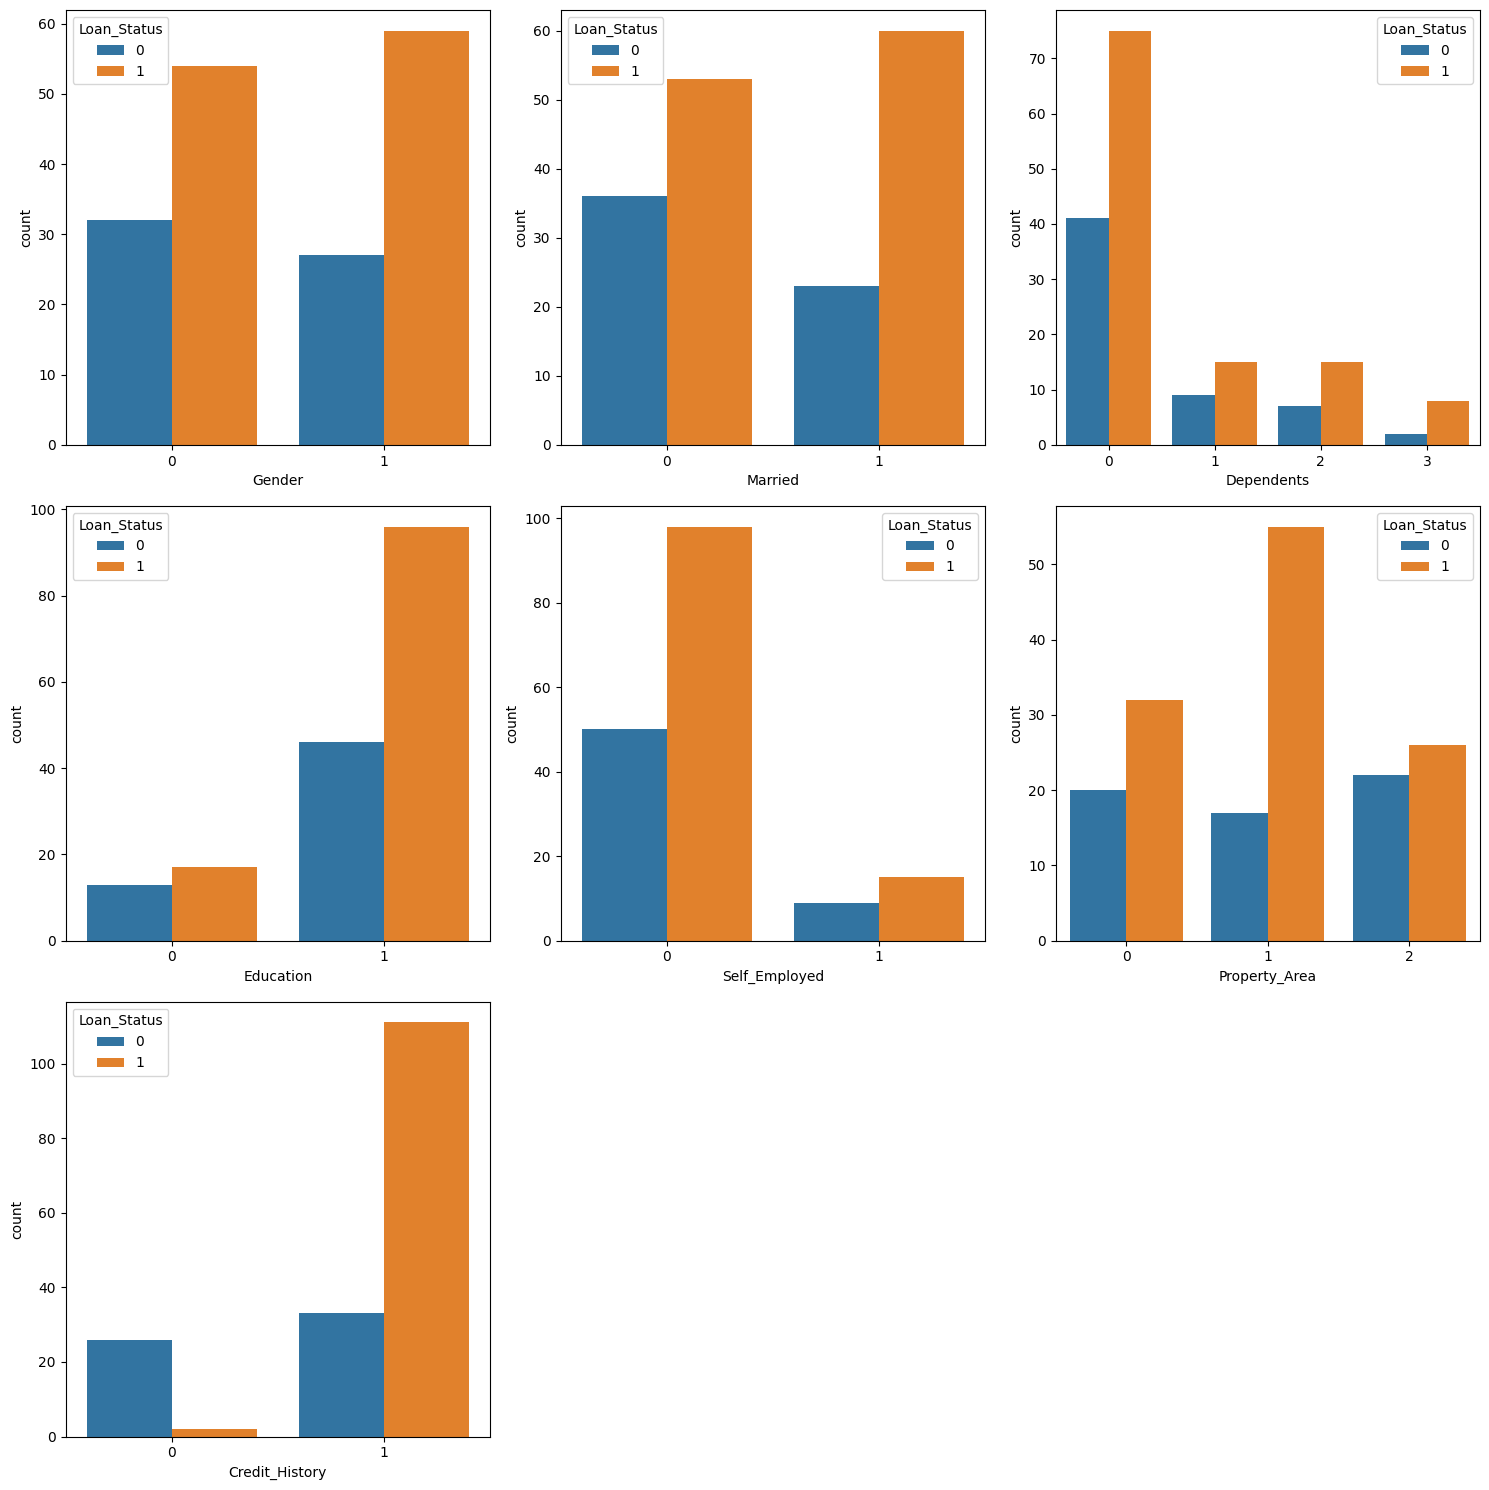

In [ ]:

import matplotlib.pyplot as plt

# Set up the figure grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Plot count plots for categorical variables
sns.countplot(x='Gender', hue='Loan_Status', data=ln_dt, ax=axes[0, 0])
sns.countplot(x='Married', hue='Loan_Status', data=ln_dt, ax=axes[0, 1])
sns.countplot(x='Dependents', hue='Loan_Status', data=ln_dt, ax=axes[0, 2])
sns.countplot(x='Education', hue='Loan_Status', data=ln_dt, ax=axes[1, 0])
sns.countplot(x='Self_Employed', hue='Loan_Status', data=ln_dt, ax=axes[1, 1])
sns.countplot(x='Property_Area', hue='Loan_Status', data=ln_dt, ax=axes[1, 2])
sns.countplot(x='Credit_History', hue='Loan_Status', data=ln_dt, ax=axes[2, 0])

# Remove empty subplot
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

2. Box Plot for Numerical Variables:
ApplicantIncome

CoapplicantIncome

LoanAmount

Loan_Amount_Term

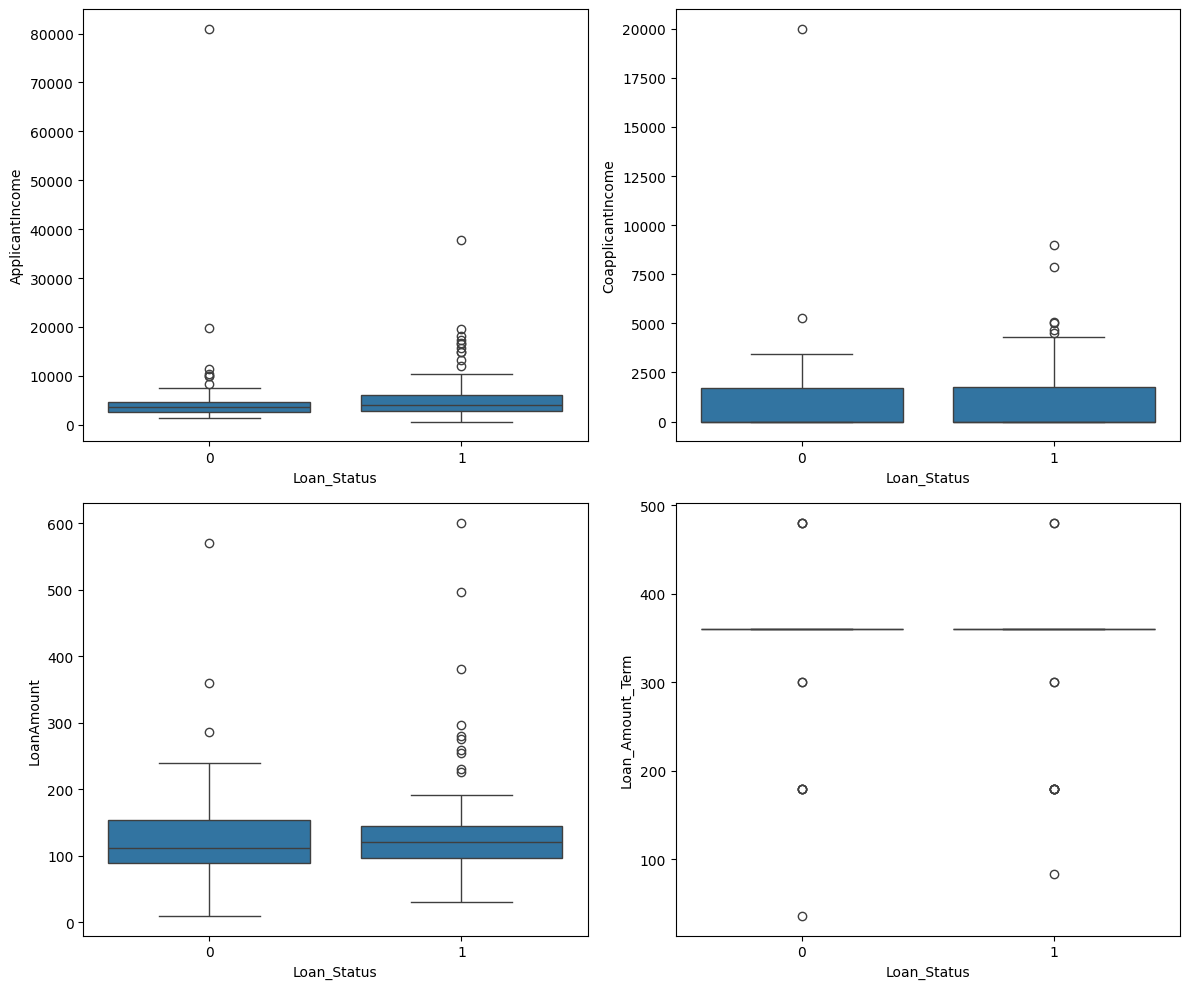

In [ ]:
# Set up the figure grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot box plots for numerical variables
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=ln_dt, ax=axes[0, 0])
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=ln_dt, ax=axes[0, 1])
sns.boxplot(x='Loan_Status', y='LoanAmount', data=ln_dt, ax=axes[1, 0])
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=ln_dt, ax=axes[1, 1])

plt.tight_layout()
plt.show()

3. Pairplot for Pairwise Relationships:

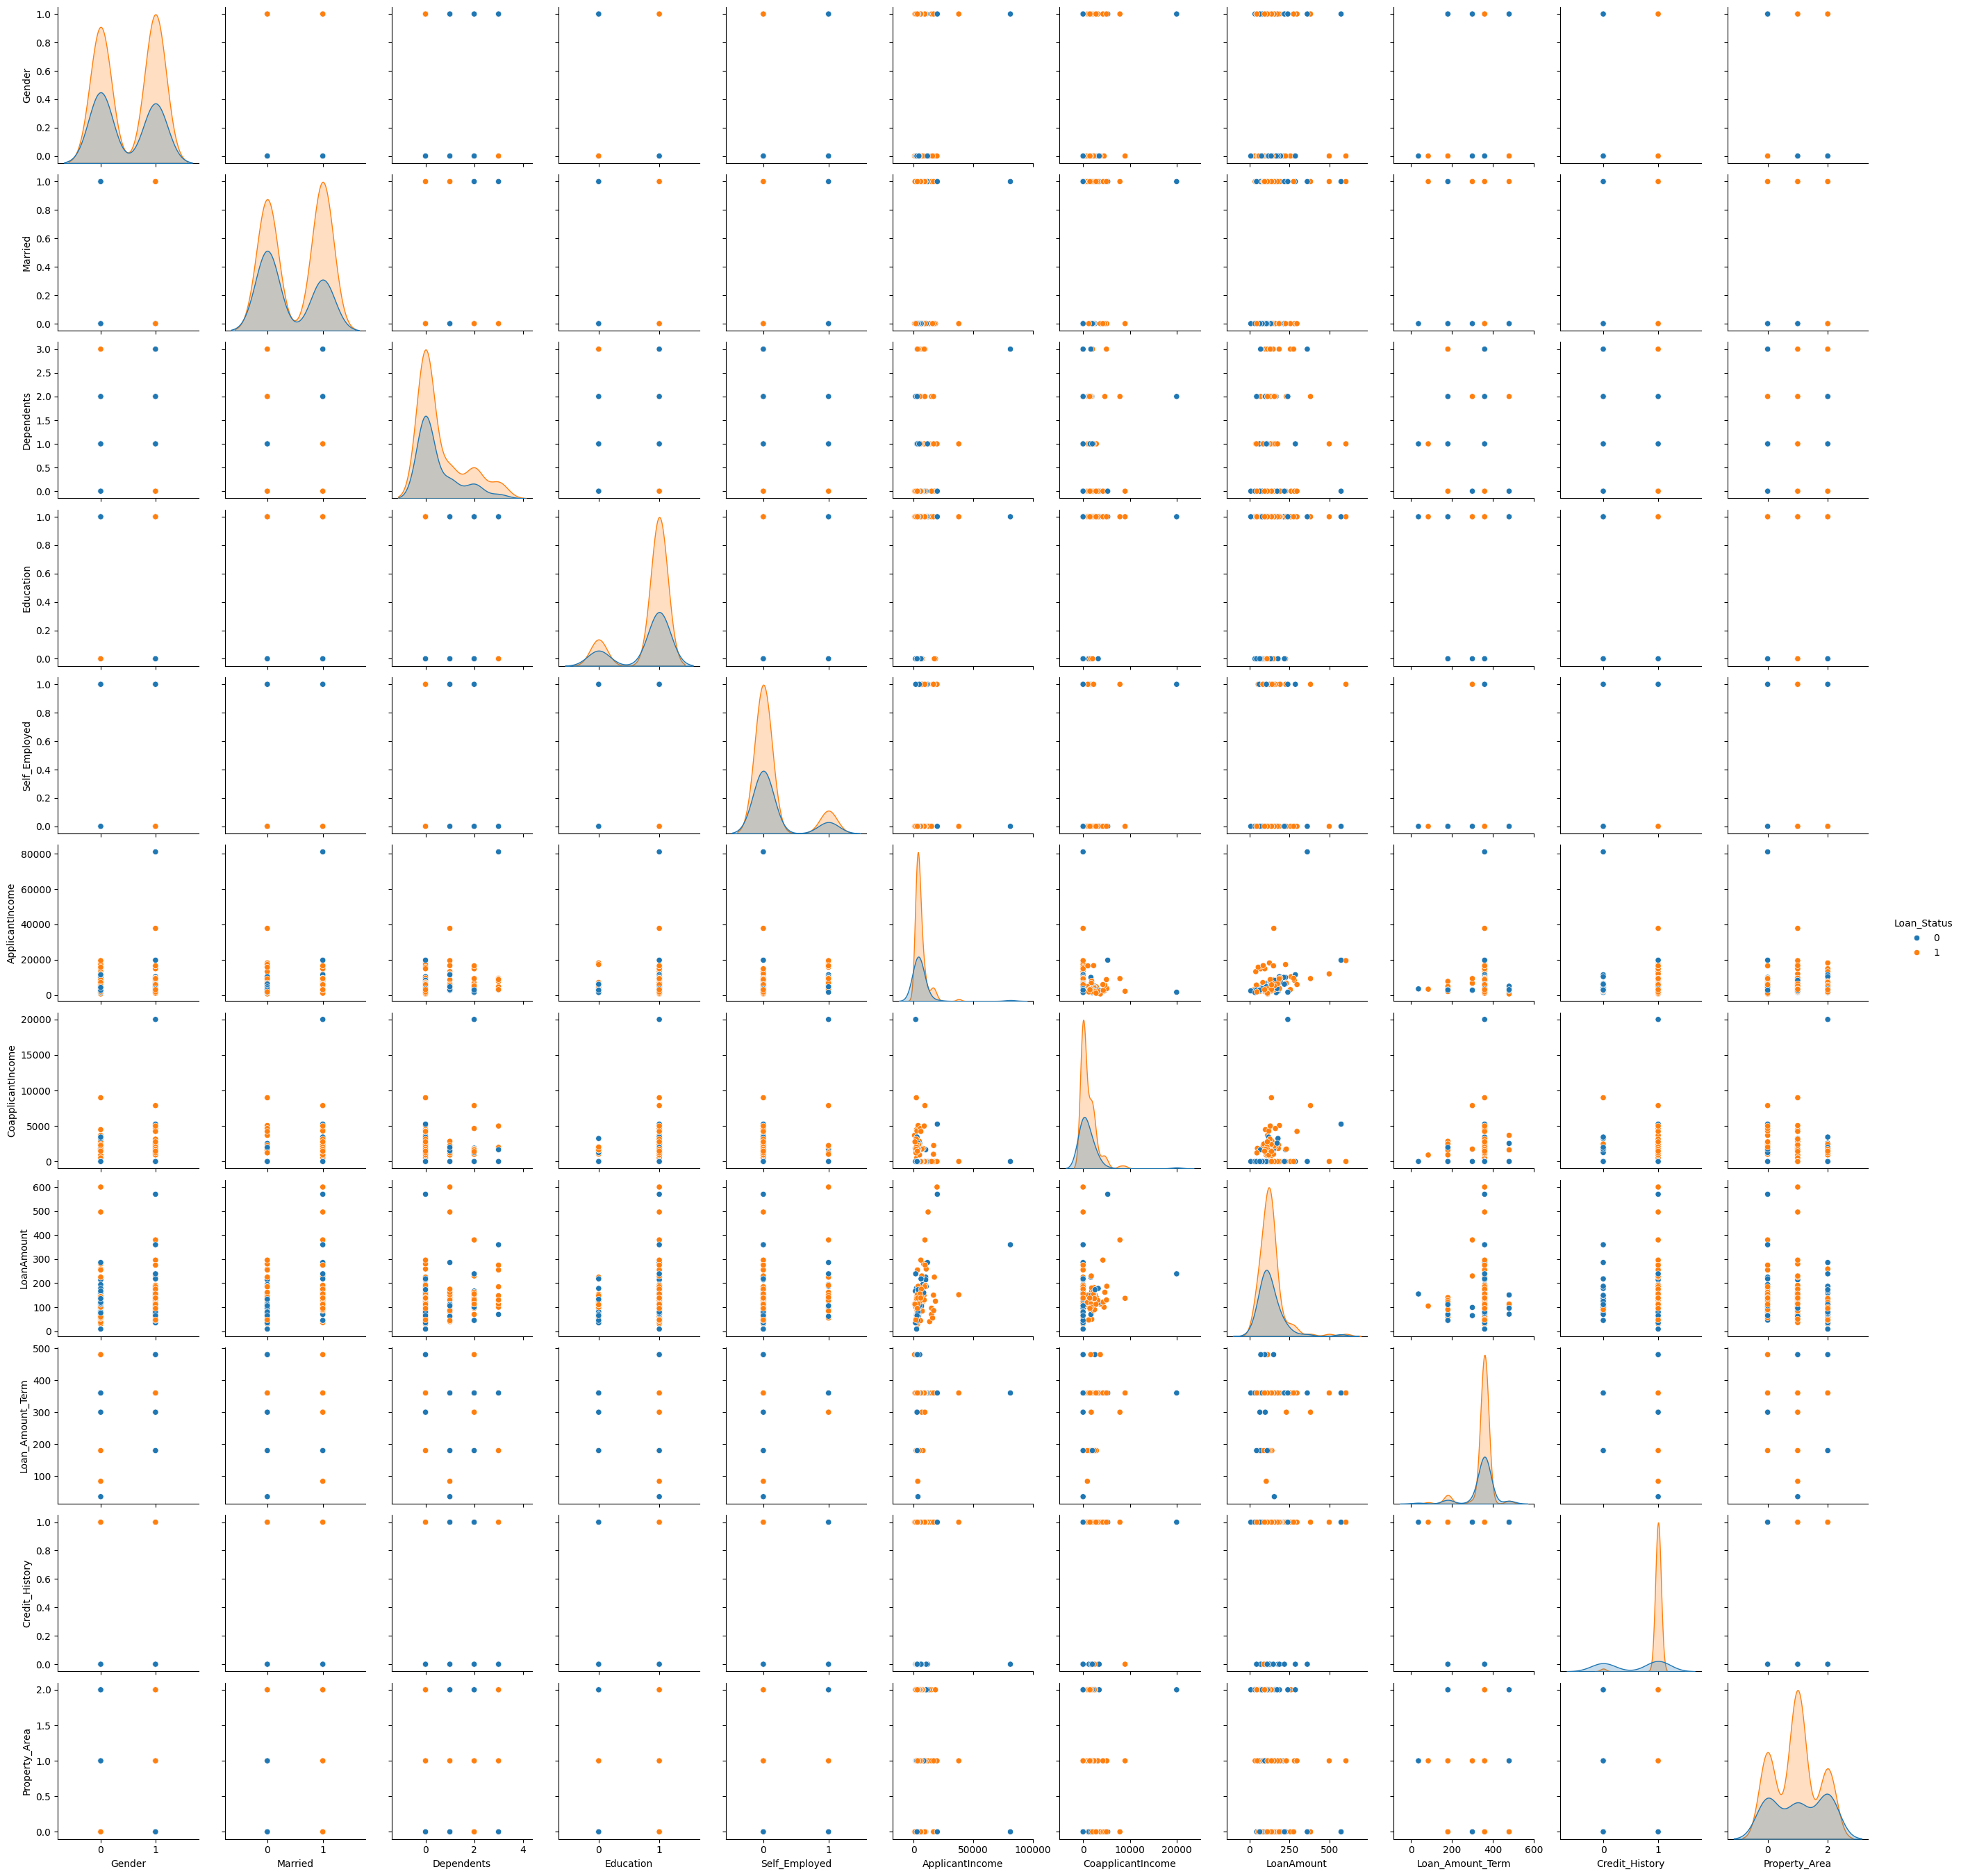

In [ ]:
sns.pairplot(ln_dt, hue='Loan_Status', diag_kind='kde')
plt.show()

**SEPARATING - DATA & LABEL**

In [ ]:
X = ln_dt.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = ln_dt['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0           0          1              0             4124   
1         0        0           0          1              1             2600   
2         0        0           0          1              0             5000   
3         0        1           1          1              0             4666   
4         0        0           0          1              0             1811   
..      ...      ...         ...        ...            ...              ...   
167       1        0           0          1              0             3600   
168       1        1           2          0              0             2889   
169       1        0           0          0              0             2755   
170       1        0           0          1              0             1800   
171       1        1           0          1              0             3033   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

**TRAIN TEST SPLIT**

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.1 , stratify = Y , random_state=2)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(172, 11) (154, 11) (18, 11)


**TRAINING THE MODEL : SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
classifier = SVC(kernel = 'linear')

In [ ]:
# training the Support Vector Machine Model
classifier.fit(X_train , Y_train)

SVC(kernel='linear')

**MODEL EVALUATION**

In [ ]:
# accuracy onb the training data

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)

In [ ]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7142857142857143


In [ ]:
print('Accuracy on training data : ', training_data_accuracy*100)

Accuracy on training data :  71.42857142857143


In [ ]:
# accuracy score on Testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [ ]:
print('Accuracy on test data:' , test_data_accuracy)

Accuracy on test data: 0.7222222222222222


In [ ]:
print('Accuracy on test data:' , test_data_accuracy*100)

Accuracy on test data: 72.22222222222221


In [ ]:
import pickle



# Save the trained model to a file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)


In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.1 MB/s 

In [ ]:
!pip install gradio
import gradio as gr
import pickle

# Load the trained model from the pickle file
with open('trained_model.pkl', 'rb') as f:
    trained_model = pickle.load(f)

def predict_loan_status(loan_id, gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area):
    # Prepare the input data for prediction
    input_data = [[gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area]]
    # Make predictions using the loaded model
    prediction = trained_model.predict(input_data)[0]
    # Convert numerical prediction to human-readable format
    if prediction == 1:
        return "Approved"
    else:
        return "Rejected"

# Define the interface with Gradio
interface = gr.Interface(
    fn=predict_loan_status,
    inputs=[

        gr.Dropdown(choices=['Male', 'Female'], label="Gender"),
        gr.Dropdown(choices=['Yes', 'No'], label="Married"),
        gr.Number(label="Dependents"),
        gr.Dropdown(choices=['Graduate', 'Not Graduate'], label="Education"),
        gr.Dropdown(choices=['Yes', 'No'], label="Self Employed"),
        gr.Number(label="Applicant Income"),
        gr.Number(label="Coapplicant Income"),
        gr.Number(label="Loan Amount"),
        gr.Number(label="Loan Amount Term"),
        gr.Dropdown(choices=['1', '0'], label="Credit History"),
        gr.Dropdown(choices=['Rural', 'Semiurban', 'Urban'], label="Property Area"),
    ],
    outputs="text",
)

# Launch the interface
interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:924: UserWarning: Expected 12 arguments for function <function predict_loan_status at 0x7a0f3500ee60>, received 11.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:928: UserWarning: Expected at least 12 arguments for function <function predict_loan_status at 0x7a0f3500ee60>, received 11.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8c5aca8a7fe34770f3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
